## 배운 거 요약
* for 문을 이용해 index값, error값들을 모으기
* ''(빈값) 처리하는 법
* df[].str.함수 사용했을 경우 체인 적용 안됨 ->.str.함수.str.함수 이런 식으로 사용해야함

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action= 'ignore')

In [35]:
# matplotlib 한글깨지는 현상 생김 -> 환경설정 해줘야 함


import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [36]:
df = pd.read_csv('./Pandas_data_file/전국 신규 민간아파트 분양가격 동향_20211031.csv', encoding= 'cp949')
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [37]:
# 문제

# 1.지역별 평당 분양가격
# 2.2021년도 지역별 분양가 평균
# 3.2015 ~ 2021년 사이 지역별 분양가 변화를 line chart로 그리시오
# 4.각 년도에 월별 분양가 box chart 로 그리시오.

In [38]:
#결측치 확인
df.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    471
dtype: int64

In [39]:
# 데이터개수
df['지역명'].count()

6205

In [40]:
# 결측치 삭제 
df = df.dropna()

#다시 데이터 개수 확인
df['지역명'].count()

5734

In [41]:
# 1. 평당 가격 = 분양가격(제곱미터) * 3.3
# 데이터타입 확인
df.info()  # 분양가격 = object  바꿔줘야함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5734 entries, 0 to 6204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         5734 non-null   object
 1   규모구분        5734 non-null   object
 2   연도          5734 non-null   int64 
 3   월           5734 non-null   int64 
 4   분양가격(제곱미터)  5734 non-null   object
dtypes: int64(2), object(3)
memory usage: 268.8+ KB


In [42]:
# df['분양가격(제곱미터)'].astype(float) # '' 때문에 float으로 바로 변환 불가

In [43]:
# df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].astype(str)

In [44]:
# 전처리 전 대략적 데이터 확인
list(df['분양가격(제곱미터)'].unique())

['5841',
 '5652',
 '5882',
 '5721',
 '5879',
 '3163',
 '3488',
 '3119',
 '3545',
 '3408',
 '3138',
 '3126',
 '3239',
 '3496',
 '3680',
 '3112',
 '2950',
 '2999',
 '2957',
 '3500',
 '2682',
 '2614',
 '2696',
 '2557',
 '2598',
 '2420',
 '2253',
 '2439',
 '  ',
 '2454',
 '2585',
 '2428',
 '2461',
 '3053',
 '2422',
 '3040',
 '2951',
 '2690',
 '2642',
 '2572',
 '2657',
 '2644',
 '2692',
 '2167',
 '2286',
 '2212',
 '2061',
 '2171',
 '2032',
 '1919',
 '2033',
 '2102',
 '2369',
 '2099',
 '2206',
 '2101',
 '2743',
 '2442',
 '2054',
 '2127',
 '2056',
 '2377',
 '2250',
 '1925',
 '1999',
 '1922',
 '2262',
 '2292',
 '2148',
 '2204',
 '2145',
 '2308',
 '2222',
 '2291',
 '2239',
 '2305',
 '2890',
 '3014',
 '2232',
 '2225',
 '2583',
 '2574',
 '6050',
 '6320',
 '5964',
 '7092',
 '6551',
 '3184',
 '3328',
 '3098',
 '3079',
 '3202',
 '3391',
 '3724',
 '3131',
 '2982',
 '3037',
 '3739',
 '2749',
 '2503',
 '2806',
 '2424',
 '2251',
 '2444',
 '3043',
 '2584',
 '3048',
 '2663',
 '2874',
 '2648',
 '2666',
 '2

In [45]:
# for문을 통한 에러값 모아주기
lndex = []
error =[]

for i, j in enumerate(df['분양가격(제곱미터)']):  # i= 인덱스 , j= 칼럼값
    try:
        float(j)
        lndex.append(i)
    except:
        error.append(j)

In [46]:
# 모아진 에러값들 확인
print(error)  # 공백, 쉼표(,), -

['  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', ' 9,501 ', ' 9,724 ', ' 9,518 ', ' 7,044 ', ' - ', ' 4,315 ', ' 4,387 ', ' 4,283 ', ' 4,824 ', ' 5,312 ', ' 4,227 ', ' 4,125 ', ' 4,205 ', ' 4,283 ', ' 5,194 ', ' 4,358 ', ' 4,202 ', ' 4,327 ', ' 3,971 ', ' 4,518 ', ' 4,750 ', ' 4,644 ', ' 4,771 ', ' 4,257 ', ' 5,010 ', ' 4,338 ', ' 2,957 ', ' 4,027 ', ' - ', ' 4,668 ', ' 3,717 ', ' 3,862 ', ' 3,715 ', ' - ', ' - ', ' 4,303 ', ' 4,862 ', ' 4,290 ', ' 3,515 ', ' - ', ' 3,804 ', ' 4,041 ', ' 3,883 ', ' 3,858 ', ' 3,593 ', ' 2,857 ', ' 2,867 ', ' 2,846 ', ' 2,811 ', ' 3,309 ', ' 2,646 ', ' 2,596 ', ' 2,672 ', ' 2,688 ', ' 2,750 ', ' 2,892 ', ' 2,860 ', ' 2,885 ', ' 3,085 ', ' 3,429 ', ' 2,641 ', ' 2,529 ', ' 2,625 ', ' 3,240 ', ' 3,378 ', ' 3,178 ', ' 2,680 ', ' 3,178 ', ' - ', ' 3,278 ', ' 3,135 ', ' 2,861 ', ' 3,119 ', ' 3,955 ', ' 3,943 ', ' 3,295 ', ' 3,172 ', ' 3,277 ', ' 4,051 ', ' 3,558 ', ' 8,356 ', ' - ', ' 8,410 ', ' - ', ' 7,727 ', 

In [47]:
# 에러값들 전처리

# df['분양가격(제곱미터)']= df['분양가격(제곱미터)'].apply(lambda x :x.strip().replace(',','').replace('-',''))

# df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].str.strip().replace(',','').replace('-','') 
# 이어서 했을 시 처리 안되는 값들 발생
# df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].str.strip().str.replace(',','').str.replace('-','')  이렇게 해야함

df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].str.strip()
df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].str.replace(',','')
df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].str.replace('-','')

list(df['분양가격(제곱미터)'])

['5841',
 '5652',
 '5882',
 '5721',
 '5879',
 '3163',
 '3488',
 '3119',
 '3545',
 '3408',
 '3138',
 '3126',
 '3239',
 '3496',
 '3680',
 '3112',
 '2950',
 '2999',
 '2957',
 '3500',
 '2682',
 '2614',
 '2696',
 '2557',
 '2598',
 '2420',
 '2253',
 '2439',
 '',
 '',
 '2454',
 '2585',
 '2428',
 '2461',
 '',
 '3053',
 '2422',
 '3040',
 '2951',
 '2690',
 '2642',
 '2572',
 '2657',
 '2644',
 '2692',
 '2167',
 '2286',
 '2212',
 '2061',
 '2171',
 '2032',
 '1919',
 '2033',
 '2102',
 '2369',
 '2099',
 '2206',
 '2101',
 '2743',
 '2442',
 '2054',
 '2127',
 '2056',
 '2377',
 '2250',
 '1925',
 '1999',
 '1922',
 '2262',
 '2292',
 '2148',
 '2204',
 '2145',
 '2308',
 '2222',
 '2291',
 '2239',
 '2305',
 '2890',
 '3014',
 '2232',
 '',
 '2225',
 '2583',
 '2574',
 '6050',
 '6320',
 '5964',
 '7092',
 '6551',
 '3184',
 '3328',
 '3119',
 '3545',
 '3408',
 '3098',
 '3079',
 '3202',
 '3391',
 '3724',
 '3131',
 '2982',
 '3037',
 '2957',
 '3739',
 '2749',
 '2503',
 '2806',
 '2557',
 '2743',
 '2424',
 '2251',
 '2444',

In [48]:
# '' 값 = 빈 문자열 값 nan값으로 만들어줘야 없앨 수 있다

df[df['분양가격(제곱미터)']==''] = np.nan

In [49]:
# 전처리 완료
df = df.dropna()
# list(df['분양가격(제곱미터)'])

In [50]:
# 1.지역별 평당 분양가격
df.head(3)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015.0,10.0,5841
1,서울,전용면적 60제곱미터이하,2015.0,10.0,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015.0,10.0,5882


In [51]:
df['평당분양가격'] = df['분양가격(제곱미터)'].astype(float)*3.3
# df[df['분양가격(제곱미터)']== '9,501']

# list(df['평당분양가격']) 

In [52]:
df.groupby('지역명')['평당분양가격'].mean()

지역명
강원     8605.250142
경기    13791.676438
경남     9802.436798
경북     9012.194169
광주    11110.364262
대구    13037.493539
대전    10559.694444
부산    12557.557808
서울    25293.933241
세종    10340.986452
울산    11252.015546
인천    12959.529640
전남     8199.387640
전북     8031.167036
제주    12967.159184
충남     8580.228902
충북     7907.836364
Name: 평당분양가격, dtype: float64

In [67]:
# 2.2021년도 지역별 분양가 평균

# 2021년 자료로 모아진 dataframe을 만든다
df1 = df[df['연도']==2021]
df1.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
5355,서울,모든면적,2021.0,1.0,8566,28267.8
5356,서울,전용면적 60제곱미터이하,2021.0,1.0,8691,28680.3
5357,서울,전용면적 60제곱미터초과 85제곱미터이하,2021.0,1.0,7892,26043.6
5358,서울,전용면적 85제곱미터초과 102제곱미터이하,2021.0,1.0,9769,32237.7
5359,서울,전용면적 102제곱미터초과,2021.0,1.0,9481,31287.3


In [70]:
# 2021년의 지역별 분양가 평균
df2 = df1.groupby(['연도','지역명'])['평당분양가격'].mean()
df2

연도      지역명
2021.0  강원     10241.418000
        경기     14547.522000
        경남     11310.288000
        경북     11180.070000
        광주     13635.000000
        대구     15501.750000
        대전     11885.830000
        부산     13962.564000
        서울     28980.815217
        세종     12578.742000
        울산     14144.604878
        인천     15762.582000
        전남      9957.574468
        전북      8981.051020
        제주     22909.300000
        충남      9746.687500
        충북      8806.578000
Name: 평당분양가격, dtype: float64

<AxesSubplot:xlabel='연도'>

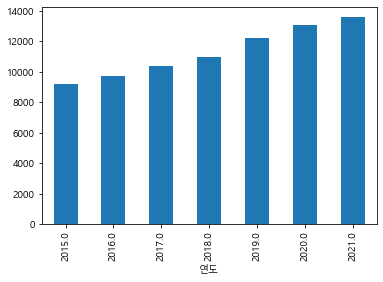

In [71]:
# 3. 2015 ~ 2021년 사이 지역별 분양가 변화를 line chart로 그리시오

df.groupby('연도')['평당분양가격'].mean().plot(kind='bar')

In [72]:
# 4.각 년도에 월별 분양가 box chart 로 그리시오.

<AxesSubplot:>

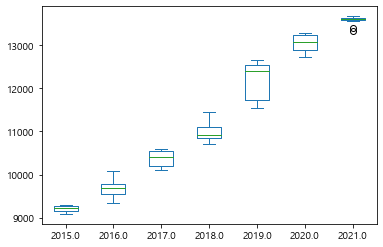

In [76]:
df.groupby(['월','연도'])['평당분양가격'].mean().unstack().plot(kind ='box')